## Synthetic Data Generation

In [10]:
import os
import cv2
import glob
import numpy as np
import logging
import configparser

from skimage.morphology import disk
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount("/content/drive", force_remount=True)

In [11]:
# Read parameters from a configuration file
config = configparser.ConfigParser()
config.read('config.ini')

# Access the paths using the 'DEFAULT' section
project_path              = config['DEFAULT']['PROJECT_PATH']
depth_images_dataset_path = config['DEFAULT']['DEPTH_IMAGES_DATASET_PATH']
training_dataset_path     = config['DEFAULT']['TRAINING_DATASET_PATH']
x_training_dataset_path   = config['DEFAULT']['X_TRAINING_DATASET_PATH']
y_training_dataset_path   = config['DEFAULT']['Y_TRAINING_DATASET_PATH']

print('PROJECT_PATH:' + project_path)
print('depth_images_dataset_path:' + depth_images_dataset_path)

PROJECT_PATH:./
depth_images_dataset_path:./data/depth_images/


Import Synthetic Data Library

In [15]:
import sys

sys.path.append(project_path)

import utils.dh_synthetic_data_generation as syn

Load the displacement maps

In [16]:

displacement_maps = syn.load_images(depth_images_dataset_path)
num_images    = len(displacement_maps)

print(f'Number of images: {num_images}')

Number of images: 13


Display icons with the displacement maps

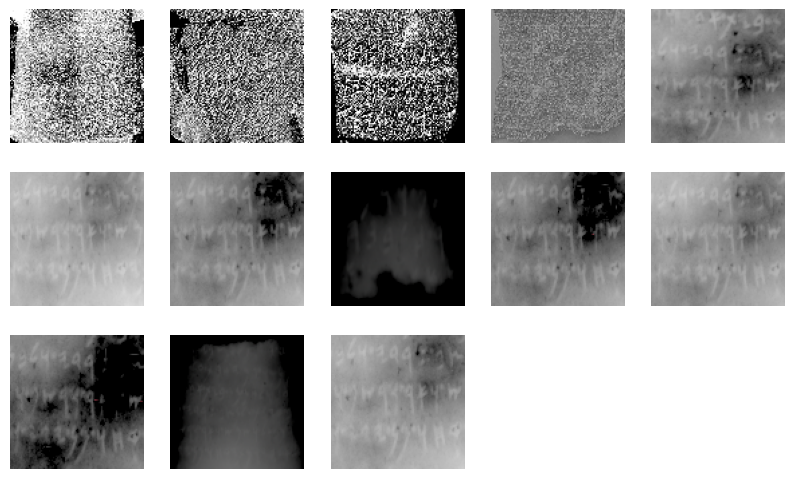

In [8]:
syn.display_images(displacement_maps)

### Image processing

Augmentation techniques:
- cutout,
- random erasing,
- random cropping etc.

These introduce occlusions to help restore damaged areas.

In [33]:

syn.generate_synthetic_maps(displacement_maps)